In [1]:
%load_ext autoreload
%autoreload 2
!nvidia-smi
!nvcc --version

Mon May 27 16:08:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060 ...    Off | 00000000:01:00.0  On |                  N/A |
| 36%   39C    P8              10W / 184W |    281MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
import sys
import os
from pathlib import Path
sys.path.append(os.path.abspath('../'))
import mitsuba as mi
import torch
from matplotlib import pyplot as plt
import drjit as dr
from utils_mitsuba import setup_shadowscene
device = 'cpu'
if torch.cuda.is_available():
    print("using cuda")
    device = 'cuda'
    mi.set_variant('cuda_ad_rgb')
# device = 'cpu'
# mi.set_variant('scalar_rgb')
mi.variants()

using cuda


['scalar_rgb', 'scalar_spectral', 'cuda_ad_rgb', 'llvm_ad_rgb']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..3.7824943].


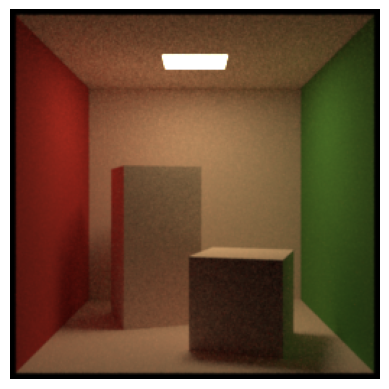

In [2]:
img=mi.render(mi.load_dict(mi.cornell_box()))
plt.axis("off")
plt.imshow(img ** (1.0 / 2.2)); # approximate sRGB tonemapping
mi.util.write_bitmap("cbox_test.png", img)

In [3]:
hparams = {'resx': 256,
            'resy': 192,
            'nsamples': 1,
            'sigma': 0.5,
            'render_spp': 32,
            'initial_translation': [-0.5, 2.5],
            'gt_translation': [-1.5, 1.0],
            'learning_rate': 2e-2,
            'epochs': 400,
            'sigma_annealing': True,
            'anneal_const_first': 200,
            'anneal_const_last': 0,
            'anneal_sigma_min': 0.01,
            'integrator': 'path',
            'max_depth': 6,
            'reparam_max_depth': 2}
scene, params, mat_id, initial_vertex_positions = setup_shadowscene(hparams)

/home/samuel/Dataset/prdpt2024/code


FileNotFoundError: [Errno 2] No such file or directory: 'scenes/shadows/shadows.xml'

In [7]:
# scene = mi.load_file('./scenes/shadows/shadows.xml')
img=mi.render(scene)
plt.axis("off")
plt.imshow(img ** (1.0 / 2.2)); # approximate sRGB tonemapping
mi.util.write_bitmap("shadows.png", img)

RuntimeError: ​[xml.cpp:179] Error while loading "./scenes/shadows/shadows.xml" (at line 12, col 4): could not parse integer value "depth_value".